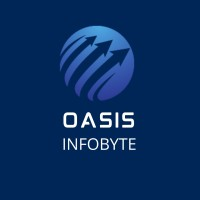

### **Name :** <font color = #5a5a5a>Harshal Prakash Margaj<font/>
### **Task 4 :** <font color = #5a5a5a>EMAIL SPAM DETECTION WITH MACHINE LEARNING<font/>
### **Description :** <font color = #5a5a5a>We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content. In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam. Let’s get started! Download dataset from [here](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)<font/>

# **Importing Libraries**

In [59]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [60]:
class color:
   GREEN = '\033[92m'  
   RED = '\033[91m'
   BOLD = '\033[1m'
   END = '\033[0m'

# **Load the dataset**

In [61]:
df = pd.read_csv('/content/spam.csv', encoding = "ISO-8859-1")
df.head() # To see first five rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### **<font color = #0E86D4>To see last five rows of the dataset<font/>**

In [62]:
df.tail() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


### <font color = #0E86D4>**Let's check to see whether this dataset has any null values:**<font/>

In [63]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### <font color = #0E86D4>**Remove Null values**<font/>

In [64]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

### <font color = #0E86D4>**Rename Columns**<font/>

In [65]:
df.columns = ['Category', 'Messages']

In [66]:
df.columns

Index(['Category', 'Messages'], dtype='object')

### <font color = #0E86D4>**Let's check again to see whether this dataset has any null values:**<font/>

In [67]:
df.isnull().sum()

Category    0
Messages    0
dtype: int64

# **Split the dataset into training and testing**

In [68]:
from sklearn.model_selection import train_test_split

x = df['Messages']
y = df['Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Feature Extraction**
<font color = #5a5a5a>**Feature extraction refers to the process of transforming raw data into numerical features**<font/>

In [70]:
def process_text(message):
  no_punctuation = [char for char in message if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  clean_words = [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]
  return clean_words

<font color = #5a5a5a>**CountVectorizer convert a collection of text documents to a matrix of token counts**<font/>

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = process_text)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# **Training Email Spam Detection Model**

**<font color = #5a5a5a>To train the model I used Naive Bayes Classifier<font/>**

In [72]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
predictions = model.predict(x_train)
print(predictions)
print(y_train.values)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


## <font color = #5a5a5a>**Evaluate the model on the training dataset**<font/>

### <font color = #0E86D4>**Classification Report of training data**<font/>

In [73]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

pred = model.predict(x_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3862
        spam       0.98      0.98      0.98       595

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457



### <font color = #0E86D4>**Confusion Metrix of training data**<font/>

In [74]:
print(confusion_matrix(y_train, pred)) 

[[3849   13]
 [  12  583]]


### <font color = #0E86D4>**Accuracy of training data**<font/>

In [75]:
# Accuracy Score
print(f"Accuracy of training dataset is {round(accuracy_score(y_train, pred)* 100, 2)}")

Accuracy of training dataset is 99.44


### <font color = #0E86D4>**Plotting Actual and Predicted Category of training data**<font/>

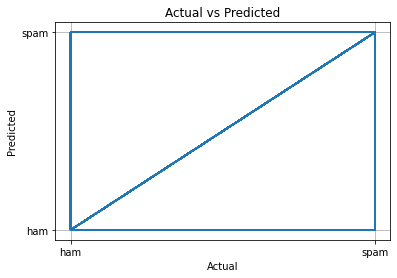

In [76]:
from matplotlib import pyplot as plt
plt.plot(y_train, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

## <font color = #5a5a5a>**Evaluate the model on the testing dataset**<font/>

In [77]:
predictions = model.predict(x_test)
print(predictions)
print(y_test.values)

['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'ham' 'spam' 'ham']


### <font color = #0E86D4>**Classification Report of testing data**<font/>

In [78]:
pred = model.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       963
        spam       0.97      0.96      0.96       152

    accuracy                           0.99      1115
   macro avg       0.98      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



### <font color = #0E86D4>**Confusion Metrix of training data**<font/>

In [79]:
print(confusion_matrix(y_test, pred))

[[958   5]
 [  6 146]]


### <font color = #0E86D4>**Accuracy of training data**<font/>

In [80]:
print(f"Accuracy of testing dataset is {round(accuracy_score(y_test, pred)* 100, 2)}")

Accuracy of testing dataset is 99.01


### <font color = #0E86D4>**Plotting Actual and Predicted Category of testing data**<font/>

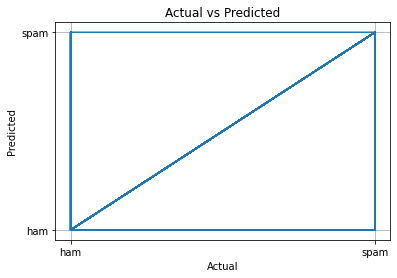

In [81]:
from matplotlib import pyplot as plt
plt.plot(y_test, pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

# **Prediction**

In [82]:
# Input Message
input_message = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

# Transform input message into numerical features
input_message_vectorizer = vectorizer.transform(input_message)

# Predict the input message
prediction = model.predict(input_message_vectorizer)

if prediction == 'spam':
  print(color.BOLD + color.RED + "📧 This message is "  + prediction[0] + color.END)
else:
  print(color.BOLD + color.GREEN + "📧 This message is "  + prediction[0] + color.END)

📧 This message is ham


# <center>**Thank You!**<center/>